<a href="https://colab.research.google.com/github/Kar3nOrtega/KarenOrtega/blob/main/Semana2/taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODELOS PREDICTIVOS PARA SISTEMAS INTELIGENTES

## Ejercicio: Limpieza usando pandas

In [2]:
# Cargar el dataset DailyDelhiClimateTrain.csv

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("/content/DailyDelhiClimateTrain.csv", header =0)
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [42]:
# Verificar las estadísticas generales del dataset
data.describe()


# Revisar si encuentra algo fuera de lo normal

#en los datos se encuentran registros con datos negativos y diferencias entre ellos de gran cantidad en la distancia de los datos





,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [41]:
# Revisar la información, encuentre en los datos máximos y mínimos de las variables
data.info()
dat_min = data.min()
dat_max =data.max()
print (dat_min)
print (dat_max)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
date            2013-01-01
meantemp               6.0
humidity         13.428571
wind_speed             0.0
meanpressure     -3.041667
dtype: object
date             2017-01-01
meantemp          38.714286
humidity              100.0
wind_speed            42.22
meanpressure    7679.333333
dtype: object


In [4]:
# Eliminar las columnas meantemp, humidity y wind_speed. Mantenga la columna meanpressure
data_aux = data.drop(['meantemp','humidity','wind_speed'], axis=1)
data_aux.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


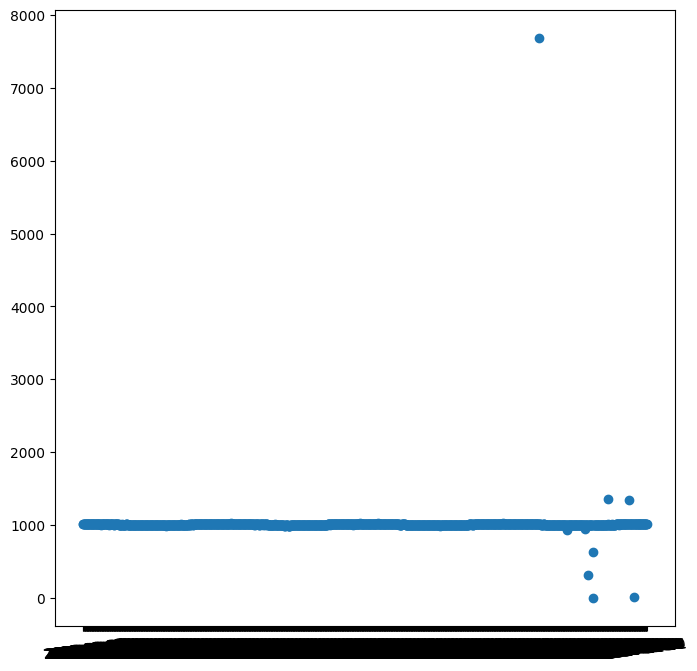

In [36]:
# Graficar los datos del campo meanpressure
import matplotlib.dates as mdates
%matplotlib inline
plt.rc('figure',figsize=(8,8))

data_aux = data_aux.dropna()
plt.scatter(data_aux.date, data_aux.meanpressure)
plt.xticks(rotation = 8)
dtFmt = mdates.DateFormatter('%y-%m-%d')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.show()


# Qué puede decir de la gráfica?
#en la grafica muestra el registro de datos , entre ellos existen datos alejados del lumbrar de data los cuales hacen referencia
#a datos atipicos y un rango de datos que se encuentran dentro del lumbral







<Axes: ylabel='meanpressure'>

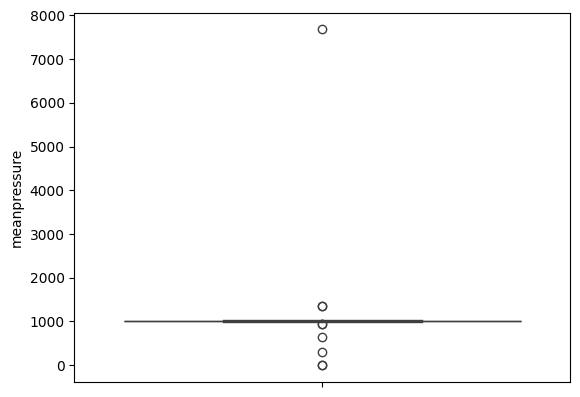

In [18]:
# Hay algo atípico en esa respuesta temporal?

#si hay algo atipico ya que hay valores que se encuentran encima de la media se verifica con la siguiente grafica de cajas o bigotes
# Realice un diagrama de cajas y alambres para determinar visualmente si hay outliers
sns.boxplot(data=data_aux['meanpressure'])

In [12]:
# Calcular el parámetro Zscore para la columna meanpressure

Zscore = np.abs(stats.zscore(data.loc[:,['meanpressure']]))
Zscore


,meanpressure
0,0.025321
1,0.037162
2,0.041972
3,0.033647
4,0.029946
...,...
1457,0.024758
1458,0.032193
1459,0.037743
1460,0.027726


In [15]:
# Variar el valor del humbral de Zscore para filtrar valores atípicos hasta que considere que la gráfica de la variable
#  meanpressure sea correcta
from inspect import indentsize

#muestra los datos atipicos que mas se alejan

index, flag =np.where(Zscore > 3)
print(index)
print (flag)




[1182 1309 1323 1427]
[0 0 0 0]


In [25]:


data_out = data_aux[(Zscore < 0.3).all(axis=1)]
data_out.head()

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


In [27]:
# Para los datos sin outliers verificar nuevamente las estadísticas generales
data_out.describe()

# Qué puede decir de los valores máximos y mínimos de los datos filtrados
#los datos maximos son registros que son atipicos
# y los minimos estan dentro del rango correcto de dastos osea no atipicos


,meanpressure
count,1453.000000
mean,1008.269018
std,7.437835
min,991.375000
25%,1001.625000
50%,1008.571429
75%,1014.937500
max,1023.000000


<Axes: ylabel='meanpressure'>

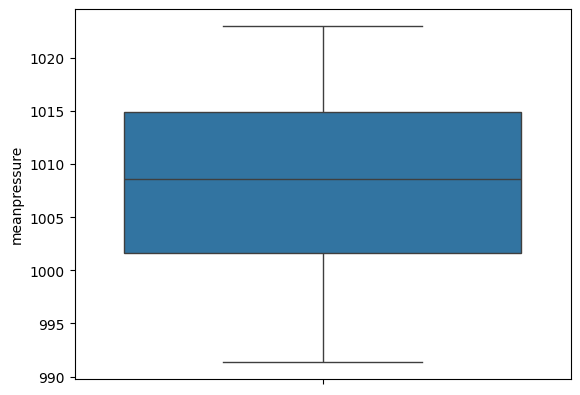

In [26]:
# Realice un diagrama de cajas y alambres para determinar visualmente si aún hay outliers
sns.boxplot(data=data_out['meanpressure'])

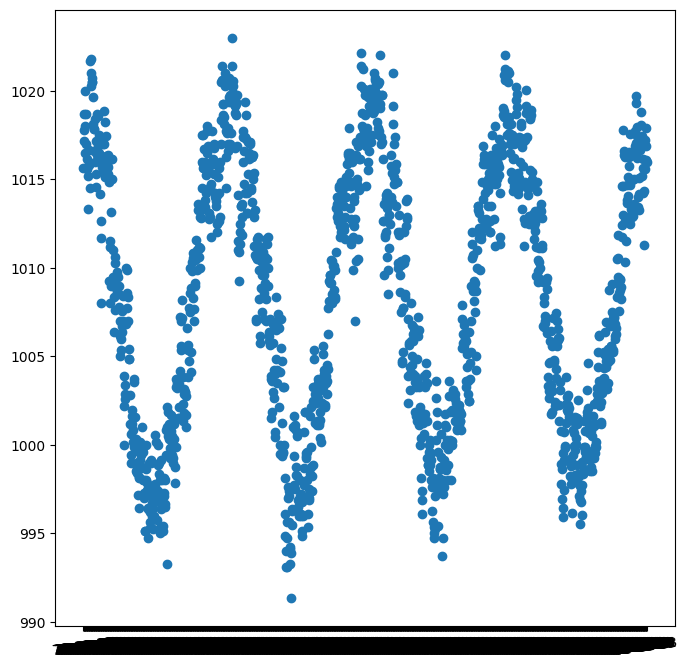

In [35]:
import matplotlib.dates as mdates
%matplotlib inline
plt.rc('figure',figsize=(8,8))

data_out = data_out.dropna()
plt.scatter(data_out.date, data_out.meanpressure)
plt.xticks(rotation = 8)
dtFmt = mdates.DateFormatter('%y-%m-%d')
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.show()